In [41]:
using LinearAlgebra;
import PyPlot as plt;
import SymPy as sp;
plt.rc("text", usetex=true);
images_path = ".//images";

# Reference Triangle Element

In [2]:
local_coords = [
    0. 0.;
    1. 0.;
    0. 1.;
];

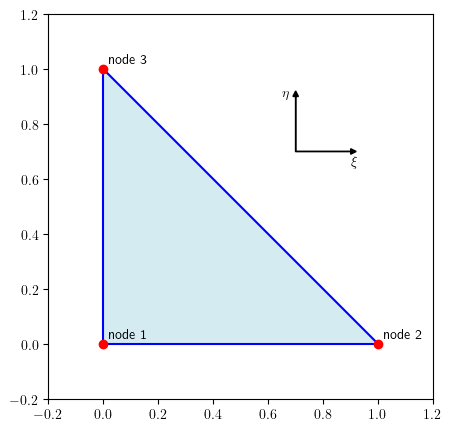

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [43]:
reference_tri_elem_figure = plt.figure(figsize=(8,5), facecolor="white");
reference_tri_elem_axes = reference_tri_elem_figure.add_subplot(1, 1, 1);

reference_tri_elem_axes.set_aspect("equal");
# larger bounding box
reference_tri_elem_axes.set_xlim(-0.2, 1.2);
reference_tri_elem_axes.set_ylim(-0.2, 1.2);

for i_node in 1:3
    reference_tri_elem_axes.scatter(local_coords[i_node, 1], local_coords[i_node, 2], color="red", zorder=10);
    reference_tri_elem_axes.text(local_coords[i_node, 1]+0.02, local_coords[i_node, 2]+0.02, "node $i_node", fontsize=10);
end

for i_node in 1:3
    next_node_index = mod(i_node, 3)+1;
    reference_tri_elem_axes.plot([local_coords[i_node, 1], local_coords[next_node_index, 1]], [local_coords[i_node, 2], local_coords[next_node_index, 2]], color="blue");
end

reference_tri_elem_axes.fill(local_coords[:, 1], local_coords[:, 2], color="lightblue", alpha=0.5);

reference_tri_elem_axes.arrow(0.7, 0.7, 0.2, 0, head_width=0.02, head_length=0.02, fc="k", ec="k");
reference_tri_elem_axes.text(0.9, 0.65, raw"$\xi$", fontsize=10);
reference_tri_elem_axes.arrow(0.7, 0.7, 0, 0.2, head_width=0.02, head_length=0.02, fc="k", ec="k");
reference_tri_elem_axes.text(0.65, 0.9, raw"$\eta$", fontsize=10);

display(reference_tri_elem_figure);

reference_tri_elem_figure.savefig(joinpath(images_path, "reference_tri_elem.png"), dpi=300, bbox_inches="tight");
reference_tri_elem_figure.show();

# Transformation

$$
\begin{bmatrix}
x\\ y
\end{bmatrix}=
\begin{bmatrix}
A_1 + A_2\xi + A_3\eta\\
B_1 + B_2\xi + B_3\eta
\end{bmatrix}
$$

Also can be written as:

$$
\begin{bmatrix}
x\\ y
\end{bmatrix}=
\begin{bmatrix}
A_2 & A_3\\
B_2 & B_3
\end{bmatrix}
\begin{bmatrix}
\xi\\ \eta
\end{bmatrix}+
\begin{bmatrix}
A_1\\ B_1
\end{bmatrix}
$$

Thus:

$$
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}=
\begin{bmatrix}
1 & \xi_1 & \eta_1\\
1 & \xi_2 & \eta_2\\
1 & \xi_3 & \eta_3
\end{bmatrix}
\begin{bmatrix}
A_1\\ A_2\\ A_3
\end{bmatrix}
$$

In [4]:
x_1, y_1 = sp.symbols("x_1, y_1");
x_2, y_2 = sp.symbols("x_2, y_2");
x_3, y_3 = sp.symbols("x_3, y_3");
xi, eta = sp.symbols("xi, eta");

In [5]:
coeff_to_node = hcat([1, 1, 1], local_coords);
coeff_to_node

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 1.0  1.0  0.0
 1.0  0.0  1.0

In [6]:
node_to_coeff = inv(coeff_to_node);
node_to_coeff

3×3 Matrix{Float64}:
  1.0  0.0  0.0
 -1.0  1.0  0.0
 -1.0  0.0  1.0

In [7]:
A_1, A_2, A_3 = Int64.(node_to_coeff) * [x_1, x_2, x_3];
x = A_1 + A_2*xi + A_3*eta;
x = x.simplify();
x

-η⋅(x₁ - x₃) + x₁ - ξ⋅(x₁ - x₂)

In [11]:
B_1, B_2, B_3 = Int64.(node_to_coeff) * [y_1, y_2, y_3];
y = B_1 + B_2*xi + B_3*eta;
y = y.simplify();
y

-η⋅(y₁ - y₃) - ξ⋅(y₁ - y₂) + y₁

In [12]:
jacobian_matrix = sp.Matrix([x y]).jacobian(sp.Matrix([xi eta]));
jacobian_matrix

2×2 Matrix{SymPy.Sym}:
 -x₁ + x₂  -x₁ + x₃
 -y₁ + y₂  -y₁ + y₃

In [38]:
jacobian_det = jacobian_matrix.det();
jacobian_det
# println(sp.latex(jacobian_det))

x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + x₂⋅y₃ + x₃⋅y₁ - x₃⋅y₂

Jacobi matrix:

$$
J=
\begin{bmatrix}
\frac{\partial x}{\partial \xi} & \frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \xi} & \frac{\partial y}{\partial \eta}
\end{bmatrix}=
\begin{bmatrix}
-x_1 + x_2 & -x_1 + x_3\\
-y_1 + y_2 & -y_1 + y_3
\end{bmatrix}
$$

it's obvious that the jacobi matrix is constant. Also the determinant of the jacobi matrix is constant:

$$
det(J)=x_{1} y_{2} - x_{1} y_{3} - x_{2} y_{1} + x_{2} y_{3} + x_{3} y_{1} - x_{3} y_{2}
$$